In [1]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
Colors = ['#004165','#dc4200',  '#69be28', '#f0be00', '#0cc6de', '#bed600', '#006983', '2b580c', '639a67']
#  save the figures
Project_Root_Directory = "."
Section_Id             = "Linear Model Training"
Images_Path            = os.path.join(Project_Root_Directory, "images", Section_Id)
os.makedirs(Images_Path, exist_ok =True)

def save_pictures(fig_id, tight_layout =True, fig_extension ="png", resolution = 300):
    path = os.path.join(Images_Path, fig_id+ "."+ fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extension, dpi = resolution)

# Linear regression using the Normal Equation

### Linear Regression

A linear model makes a prediction by simpy computing a weighted sum of the input features. Whereas the constant $\alpha_0$ is called the intercept term of bias term:

$$ y^* = \sum_{k=0}^n \alpha_k x_k =  \alpha \cdot x,$$

where $y^*$ us the predicted value. If $\alpha$ and $x$ are column vectors, we write $y^* = \alpha ^T x$. \p 

The most common performance measure of a regression model is the Rooth Mean Square Error (RMSE). In particular, linear regression model looks for the coefficients $\alpha$ that minimizes the RMSE term. The MSE cost function for a Linear Regression model:
$$ MSE(X, h_\alpha) = \frac{1}{m} \sum_{k=1}^n (\alpha ^T x - y^*)^2 $$

### The Normal Equation

In order to find the value of the coefficient $\alpha$ that minimizes the cost function, there is a closed form solution or a mathematical equation called Normal equation:
$$ \hat{\alpha} = (X^TX)^T X^Ty,
$$
where,
- $\hat{\alpha}$ is the value of $\alpha$ that minimizes the cost function.

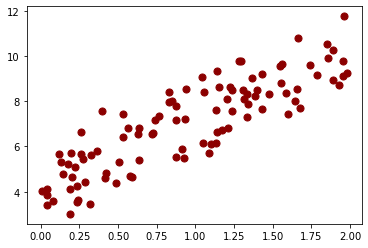

In [2]:
np.random.seed(0)
n = 100   # Number of data points
X = 2 * np.random.rand(n, 1)
y = 4 + 3 * X + 1*np.random.randn(n, 1)# Standard deviation 1

plt.scatter(X, y, marker= 'o', color = "darkred", s=50)
plt.show()

In [3]:
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance
alpha_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
alpha_hat

array([[4.22215108],
       [2.96846751]])

In [4]:
# And now we try the Linear Regression from sklearn 
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X, y)
linreg.intercept_, linreg.coef_

(array([4.22215108]), array([[2.96846751]]))

The Linear Regression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”):

In [5]:
alpha_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
alpha_best_svd

array([[4.22215108],
       [2.96846751]])

"Svd" stands for the singular value decomposition of matrix $X$. The above function compute
$$ \hat{\alpha} =  X^+ y,$$
where $X^+$ is the pseudoinverse of $X$.

# Different ways to train Linear Regression Model

- Both Normal Equation and SVD aproach get very slow when the numbers of features grow large due to the computational Compexity.
- Different ways to train a Linear Regression model include:
    * Linear regression using batch gradient descent:
        * Gradient Descent is a genetic optimization algorithm that is used to find optimal solution.
        * General idea is to tweak parameters interatively in order to minimize a cost function.
        * The learning step size is propotional to the slope of the cost function, the steps gradually get smaller as the parameters approach the minimum.
        * The size of steps plays an important role and it is determined by the learning rate hyperparameter. Large step size can fail to find a good solution.  
        * To implement Gradient Descent, we need to compute the gradient of the cost function with regard to $\alpha_j$
        $$ \frac{\partial}{\partial \alpha _j} MSE(\alpha) = \frac{2}{m} \sum_{k=1}^m (\alpha ^T x^{(k)} - y^{(k)}) x_j 
        $$
- The MSE cost function for Linear Regression model is a convex function. This means that there are no local minima, just one global minimum. This fact guarantes that the Gradient Descents appoaches arbitrarily close to the global minimum without getting lost in a local one. 
-  When using Gradient Descent, all features are recommended to have similar scale in order for the algorithm goes straight toward the minimum in short amount of time.

In [6]:
eta          = 0.1  # learning rate determines the Gradient Descent size of the steps
n_iterations = 1000
m            = X_b.shape[0]  
alpha = np.random.randn(2,1)  # start with a  random value or random initialization or first guess

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(alpha) - y) # Computing the gradient value at each iteration
    alpha = alpha - eta * gradients 
alpha

array([[4.22215108],
       [2.96846751]])

Bingo!

The first 10 steps of Gradient Descent using different learning rates. The dashed red line represents the starting position


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


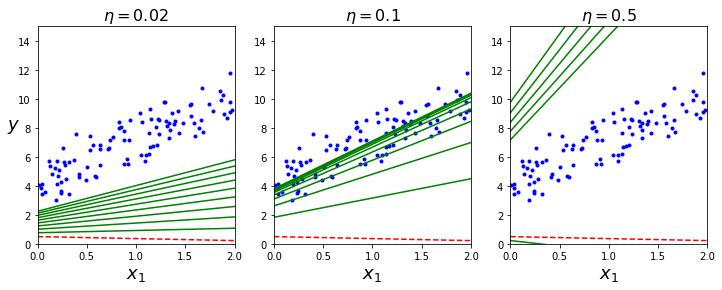

In [7]:
alpha_path_bgd = []     # initialize alpha path collection
X_new = np.array([[0], [2]])  
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each row

def plot_gradient_descent(alpha, eta, alpha_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.", )
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(alpha)
            style = "g-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(alpha) - y)
        alpha = alpha - eta * gradients
        if alpha_path is not None:
            alpha_path.append(alpha)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    #plt.xlim([0,2])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    
np.random.seed(42)
alpha = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(12,4))
plt.subplot(131); plot_gradient_descent(alpha, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(alpha, eta=0.1, alpha_path=alpha_path_bgd)
plt.subplot(133); plot_gradient_descent(alpha, eta=0.5)
print("The first 10 steps of Gradient Descent using different learning rates. The dashed red line represents the starting position")

plt.show()

# Stochastic Gradient Descent

Stochastic Gradient Descent picks a random value in the training set at every step and compute the gradients based only on that single value.
* Due to the random nature, SGD is much less regular than Batch Gradient Descent: the cost function will bounce up and down, decreasing only on avarage. 
* SGD is optimal when the cost function is irregular (the derivative is not available). Randomess if good to escape from local optima. However, this is also a bad thing as the algorithm can never settle at the minumum. We can overcome this issue by gradually reduce the learning rate $\eta$. 

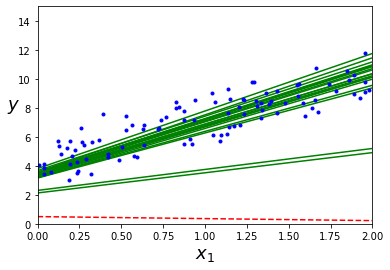

In [8]:
alpha_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters
plt.figure()

def learning_schedule(t): # The function that determines the learning rate at each iteration
    return t0 / (t + t1)

alpha = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs): # An epoch is around of iteration
    for k in range(m):
        if epoch == 0 and k < 20:                    
            y_predict = X_new_b.dot(alpha)           
            style = "g-" if k > 0 else "r--"       
            plt.plot(X_new, y_predict, style)       
        random_index = np.random.randint(m)
        xk = X_b[random_index:random_index+1]
        yk = y[random_index:random_index+1]
        gradients = 2 * xk.T.dot(xk.dot(alpha) - yk)
        eta = learning_schedule(epoch * m + k)
        alpha = alpha - eta * gradients
        alpha_path_sgd.append(alpha)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)          
plt.axis([0, 2, 0, 15])                              
plt.show()                        

In [9]:
# SGDRegressor class is set default to optimizing the squared error cost function MSE.
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
# maximum 1000 epochs or unstil the loss drops by less than 0.001. 
# It starts with learning rate of 0.1  and uses the default learning schedule. 
# Penalty = None means do not use any regularization.
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.15864149]), array([2.93216441]))

### Mini-batch gradient descent
* At each step, instead of computing the gradients based on the full training set or based on one instance, Mini-batch GD computes the gradients on small random sets of intances called mini-batches.
* Mini-batch GD walks around a bit closer to the minimum than Stochastic GD 
* Maybe harder for it to escape from local minima

<Figure size 432x288 with 0 Axes>

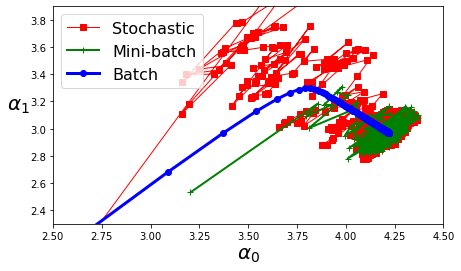

In [10]:
alpha_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
alpha = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(alpha) - yi)
        eta = learning_schedule(t)
        alpha = alpha - eta * gradients
        alpha_path_mgd.append(alpha)
        
alpha_path_bgd = np.array(alpha_path_bgd)
alpha_path_sgd = np.array(alpha_path_sgd)
alpha_path_mgd = np.array(alpha_path_mgd)
plt.figure()
plt.figure(figsize=(7,4))
plt.plot(alpha_path_sgd[:, 0], alpha_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(alpha_path_mgd[:, 0], alpha_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(alpha_path_bgd[:, 0], alpha_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\alpha_0$", fontsize=20)
plt.ylabel(r"$\alpha_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

The above figure shows the paths taken by the three Gradient Descent algorithm in parameter space during training. They all end up mear the minimum. The Batch GD's path actually stops at the mminimum, while both Stochatic GD and Mimi-batch Gd continue to walk around (they will eventually reach the minimum if given a good learning schedule). 

# Polynomial regression

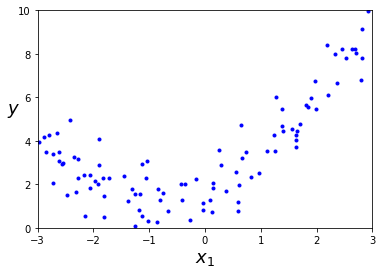

In [11]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.figure()
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [12]:
X[0,0]**2

0.5666465440380214

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) # contain X and X^2
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

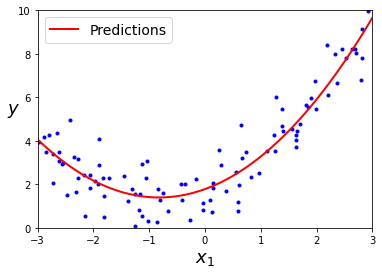

In [14]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.figure()
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

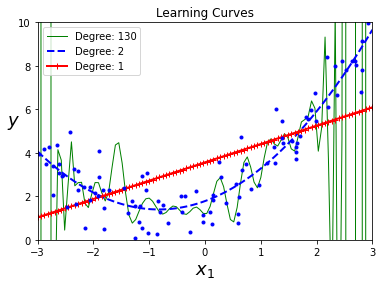

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
plt.figure()
for style, width, degree in (("g-", 1, 130), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label="Degree: {}".format(degree), linewidth=width)
    plt.title("Learning Curves")
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

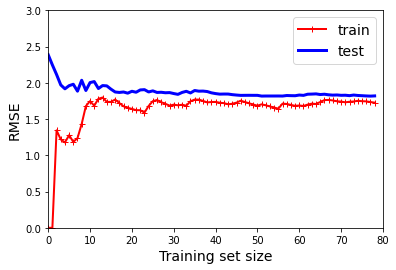

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    plt.figure()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
   
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         

plt.show()  

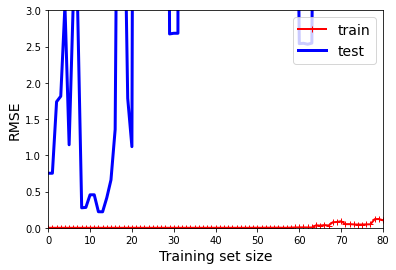

In [42]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()    

# Regularized models

In [18]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [19]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [20]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([[1.5507201]])

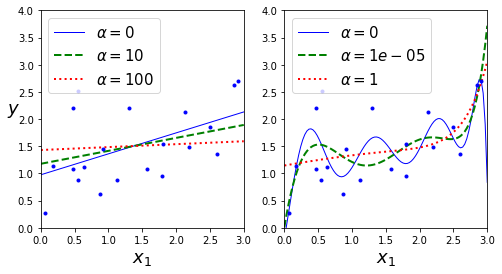

In [21]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)


plt.show()


In [22]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

C:\Users\tranli\Wdomain\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  positive)


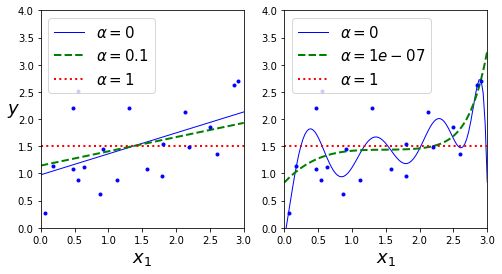

In [23]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

In [24]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [25]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [26]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_test, y_train, y_test = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [27]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_test_poly_scaled = poly_scaler.transform(X_test)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_test_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_test_predict = sgd_reg.predict(X_test_poly_scaled)
    test_error = mean_squared_error(y_test, y_test_predict)
    if test_error < minimum_test_error:
        minimum_test_error = test_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

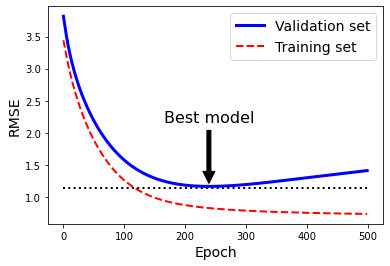

In [28]:
plt.figure()
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, test_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_test_predict = sgd_reg.predict(X_test_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

best_epoch = np.argmin(test_errors)
best_test_rmse = np.sqrt(test_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_test_rmse),
             xytext=(best_epoch, best_test_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_test_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_test_rmse, best_test_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [29]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

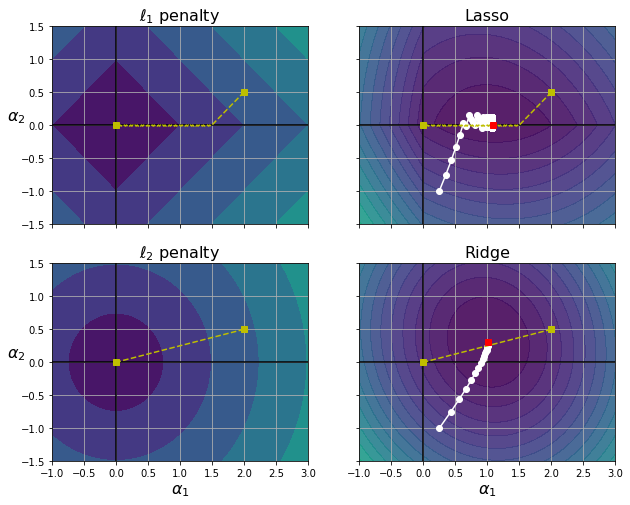

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(alpha, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [alpha]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(alpha) - y) + l1 * np.sign(alpha) + l2 * alpha
        alpha = alpha - eta * gradients
        path.append(alpha)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\alpha_1$", fontsize=16)
    ax.set_ylabel(r"$\alpha_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\alpha_1$", fontsize=16)

plt.show()